In [7]:
import codes.VAE as VAE
import torch
import torch.multiprocessing as mp
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable

training_batches, test_batches = VAE.VariationalAutoEncoder.get_MINST_train_loader()

vaes = []
for i in [2,4,6,8,10]:
    vae = VAE.VariationalAutoEncoder(i, 0, convolutional = True)
    vae.set_train_loader(training_batches, test_batches)
    vaes.append((i, vae))

In [99]:
for i, vae in vaes:
    #vae.start()
    #Lets get the trained models from the disk instead
    vae.load_state_dict(torch.load("./data/saved_models/vae_minst_{}.ptc".format(i),  map_location={'cuda:0': 'cpu'}))

<IPython.core.display.Javascript object>


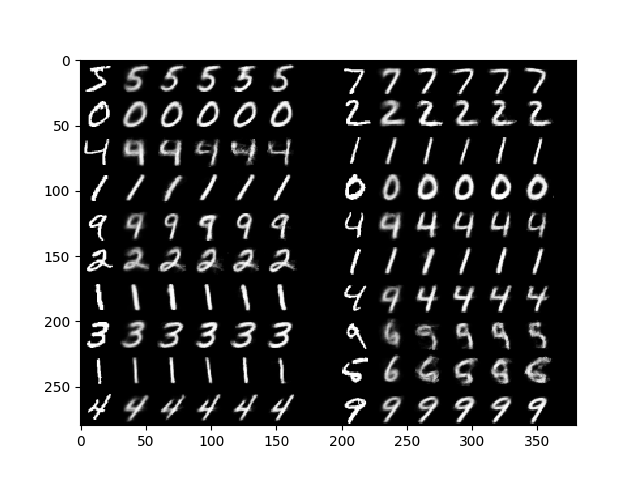

In [201]:
import matplotlib.pyplot as plt
%matplotlib notebook

training_batch = next(iter(training_batches))
test_batch = next(iter(test_batches))

im = np.zeros((280,380))
for i in range(10):
    im[i*28:i*28+28,0:28] = Variable((training_batch))[i,0].data
    for j in range(5):
        im[i*28:i*28+28,(j+1)*28:(j+1)*28+28] = vaes[j][1](Variable((training_batch)))[i,0].data

for i in range(10):
    im[i*28:i*28+28,7*28:7*28+28] = Variable((test_batch))[i,0].data
    for j in range(5):
        im[i*28:i*28+28,(j+8)*28:(j+8)*28+28] = vaes[j][1](Variable((test_batch)))[i,0].data
        
plt.imshow(im, cmap="gray")